<a href="https://colab.research.google.com/github/AdityaKendre02/perceptron/blob/main/Working_of_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import random

In [ ]:
#seed random number generator of numpy for reproducibility
np.random.seed(1000)

#Data Generation

1. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [0,0] and identity covariance matrix. Label data points as class +1. Consider this labeled data set as $D_1$.  

In [ ]:
#Generate D_1
mean = [0, 0]
cov = [[1, 0], [0, 1]]

features =  np.random.multivariate_normal(mean=mean, cov=cov, size=(10,)) #creating 10x2 feature vector described as above
label = np.ones(shape=(10, 1)) #creating 10x1 vector of ones denoting labels

D1 = np.concatenate([features, label], axis=1) #concatinating labels with features 

features.shape, label.shape, D1.shape

((10, 2), (10, 1), (10, 3))

In [ ]:
D1

array([[-0.8044583 ,  0.32093155,  1.        ],
       [-0.02548288,  0.64432383,  1.        ],
       [-0.30079667,  0.38947455,  1.        ],
       [-0.1074373 , -0.47998308,  1.        ],
       [ 0.5950355 , -0.46466753,  1.        ],
       [ 0.66728131, -0.80611561,  1.        ],
       [-1.19606983, -0.40596016,  1.        ],
       [-0.18237734,  0.10319289,  1.        ],
       [-0.13842199,  0.70569237,  1.        ],
       [ 1.27179528, -0.98674733,  1.        ]])

2. Generate 10 two-dimensional data points from a multi-variate Gaussian distribution with mean [-2,-2] and identity covariance matrix. Label data points as class -1. Consider this labeled data set as $D_2$.

In [ ]:
#Generate D_2

mean = [-2, -2]
cov = [[1, 0], [0, 1]]

features =  np.random.multivariate_normal(mean=mean, cov=cov, size=(10,)) #creating 10x2 feature vector described as above
label = -1*np.ones(shape=(10, 1)) #creating 10x1 vector of zeros denoting non spam labels

D2 = np.concatenate([features, label], axis=1) #concatinating labels with features

features.shape, label.shape, D2.shape

((10, 2), (10, 1), (10, 3))

In [ ]:
D2

array([[-2.33483545, -2.0994817 , -1.        ],
       [-1.5928079 , -1.08061246, -1.        ],
       [-1.68788199, -0.46683893, -1.        ],
       [-2.55017387, -2.38314741, -1.        ],
       [-2.82294096, -0.39991663, -1.        ],
       [-2.0692813 , -1.91679051, -1.        ],
       [-2.32692468, -2.04579719, -1.        ],
       [-2.30446006, -0.07698987, -1.        ],
       [-2.078659  , -2.58206572, -1.        ],
       [-3.61798224, -1.13273918, -1.        ]])

3. Construct $D=D_1 \cup D_2$. Shuffle the data in $D$. 

In [ ]:
#Construct D and shuffle.

D = np.concatenate([D1, D2], axis=0) #concatenating D1 and D2 along rows (axis=0)

np.random.shuffle(D) #shuffling the Datasets

D1.shape, D2.shape, D.shape

((10, 3), (10, 3), (20, 3))

In [ ]:
D

array([[-2.82294096, -0.39991663, -1.        ],
       [ 0.5950355 , -0.46466753,  1.        ],
       [-3.61798224, -1.13273918, -1.        ],
       [-0.18237734,  0.10319289,  1.        ],
       [-1.68788199, -0.46683893, -1.        ],
       [-0.8044583 ,  0.32093155,  1.        ],
       [ 0.66728131, -0.80611561,  1.        ],
       [-0.02548288,  0.64432383,  1.        ],
       [-2.0692813 , -1.91679051, -1.        ],
       [-1.19606983, -0.40596016,  1.        ],
       [-2.55017387, -2.38314741, -1.        ],
       [-2.33483545, -2.0994817 , -1.        ],
       [-0.1074373 , -0.47998308,  1.        ],
       [ 1.27179528, -0.98674733,  1.        ],
       [-1.5928079 , -1.08061246, -1.        ],
       [-0.30079667,  0.38947455,  1.        ],
       [-2.32692468, -2.04579719, -1.        ],
       [-2.078659  , -2.58206572, -1.        ],
       [-0.13842199,  0.70569237,  1.        ],
       [-2.30446006, -0.07698987, -1.        ]])

#Data Visualization

Write code to visualize the data $D$ you have generated. Use different colors for different classes. (Use matplotlib.pyplot.scatter to plot the points.)

In [ ]:
def plot_data(data):
  #write code to plot the data points. Use different colors for different classes.
  colors = {1:"red", -1:"green"}
  classes = {1:"Spam", -1:"Non-Spam"}

  plt.scatter(data[:, 0], data[:, 1], c=[colors[i] for i in data[:, 2]])

  plt.title('Data Distribution')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], label=classes[i], markersize=8) for i in [-1, 1]]
  plt.legend(title='Labels', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()

  # plt.show()

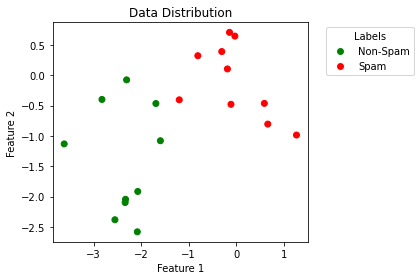

In [ ]:
plot_data(D)

#Perceptron prediction function

Write code to implement the prediction rule used in Perceptron. (Use the numpy function which helps in computing the dot product between two vectors.)

In [ ]:
def perceptron_prediction(w, x):
    #write code to compute the prediction for the example x using weight w
    sum = np.sum(w*x)
    prediction = -1
    if sum>=0:
      prediction = 1
    return prediction
assert perceptron_prediction(np.array([0, 0, 0]), np.array([1, 2.3, 3.2])) == 1
assert perceptron_prediction(np.array([-1, -1, 1]), np.array([1, 2.3, 3.2])) == -1
assert perceptron_prediction(np.array([1, -1, 1]), np.array([1, 2.3, 3.2])) == 1

#Function to update weights 

Write code to implement the update rule for updating weights in perceptron learning algorithm. If there is a mistake in prediction made by perceptron, return is_mistake as True, otherwise return is_mistake as False. 

In [ ]:
def perceptron_update_weights(w, x, y, y_pred):
    is_mistake = False
    #check for mistake and set is_mistake flag accordingly
    if y!=y_pred:
      is_mistake=True
    #and write code to update the weights in perceptron 
    if is_mistake:
      w = w + y*x
    return w, is_mistake

#Training procedure for perceptron

Complete the training procedure to train perceptron by adding appropriate code where required.

In [ ]:
def train_perceptron(data):
    #Initialize weights 
    w = np.array([0, 0, 0])  # try randomly generating w or zero initialization
    epochs=0 #useful for executing multiple passes over a finite data set
    num_mistakes = 99 #some dummy value to get the while loop going 
    max_epochs = 50
    history = {'ws':[], 'xs':[]}

    while num_mistakes > 0 and epochs<max_epochs:   # until mistakes are not zero or number of epochs reach max_epochs
        num_mistakes = 0
        for i in range(len(data)):
            #retrieve the feature vector x from data set D 
            x = data[i, :2] #x = [f1, f2]
            #Append an additional constant feature 1 to x (Use np.concatenate)
            x = np.concatenate([np.array([1]), x], axis=0) # x = [1, f1, f2]
            #print(f"x {x}")
            
            y_hat = perceptron_prediction(w, x)
            #print(f"y_hat {y_hat}")
            
            #retrieve the label y for x from data set D 
            y = data[i, [2]]
            #print(f"y {y}")
            
            #print(f"w {w}")
            w, is_mistake = perceptron_update_weights(w, x, y, y_hat)
            #print(f"w {w}")
            
            if is_mistake:
              num_mistakes += 1
              history['ws'].append(w)
              history['xs'].append(x)

        epochs=epochs+1
    return w, history

#Plotting the separating line

Write code to plot the separating line along with the data.

In [ ]:
def plot_data_with_separator(data, w=None):
  #write required code. (You can reuse the code written for plotting the data points.)
  plot_data(data)
  if w!=None:
    x = np.array([-4, 1])
    y = -(w[1]*x+w[0])/w[2]
    plt.plot(x, y)

  plt.xlim(-4, 2)
  plt.ylim(-4, 2)
  plt.tight_layout()

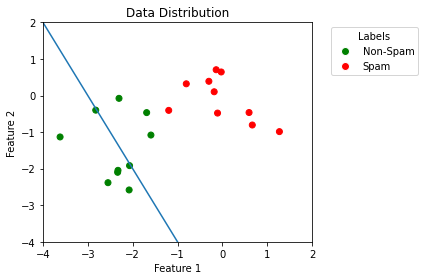

In [ ]:
plot_data_with_separator(D, [3, 1, 0.5]) #only testing purpose

#Calling the Perceptron train function.

In [ ]:
w_final, history = train_perceptron(D)    
w_final, len(history['ws'])

(array([3.        , 1.73744354, 1.75934677]), 11)

#Calling the plot function to plot separator

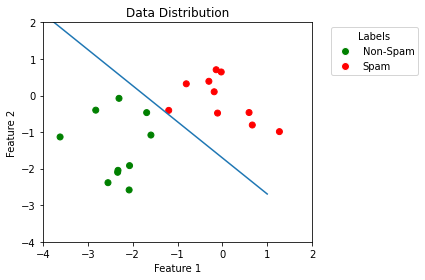

In [ ]:
plot_data_with_separator(D, w_final.tolist())

#Additional functionality (Optional):

Illustrate the behavior of the separating line between the updates as contiguous plots or as animation. Highlight the data points which cause the update in the separating line orientations.



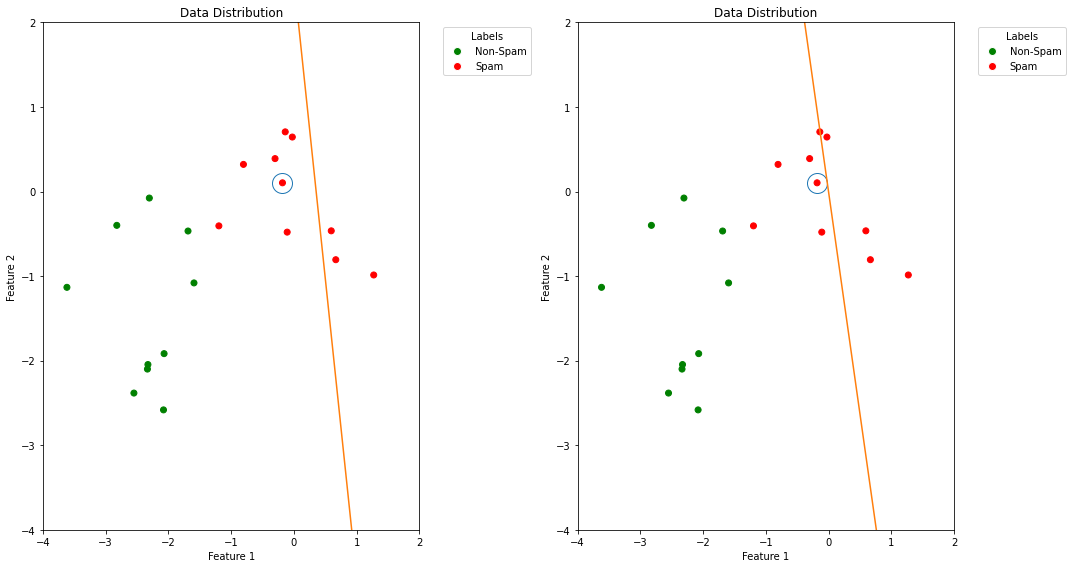

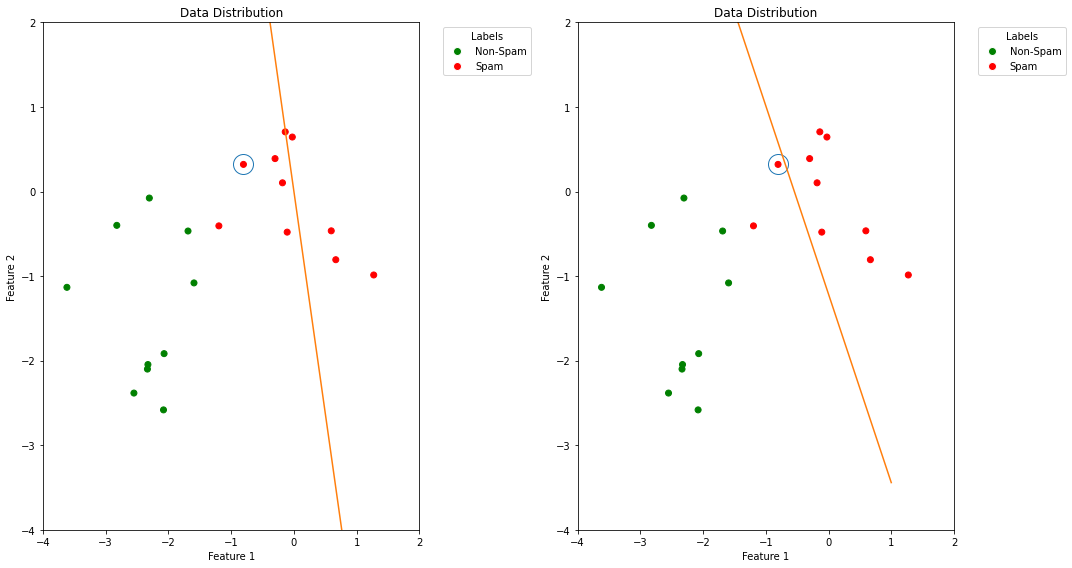

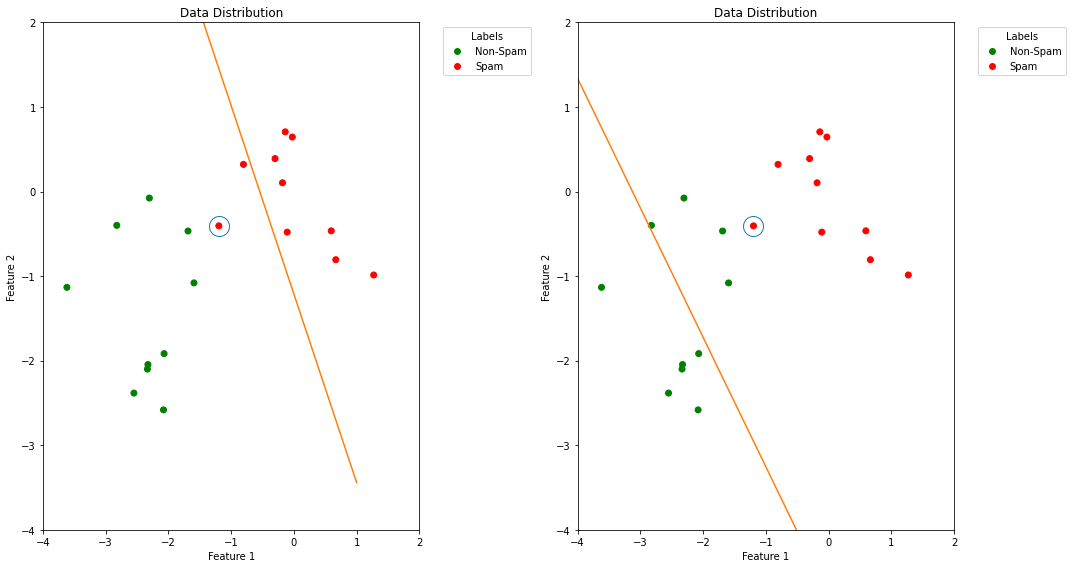

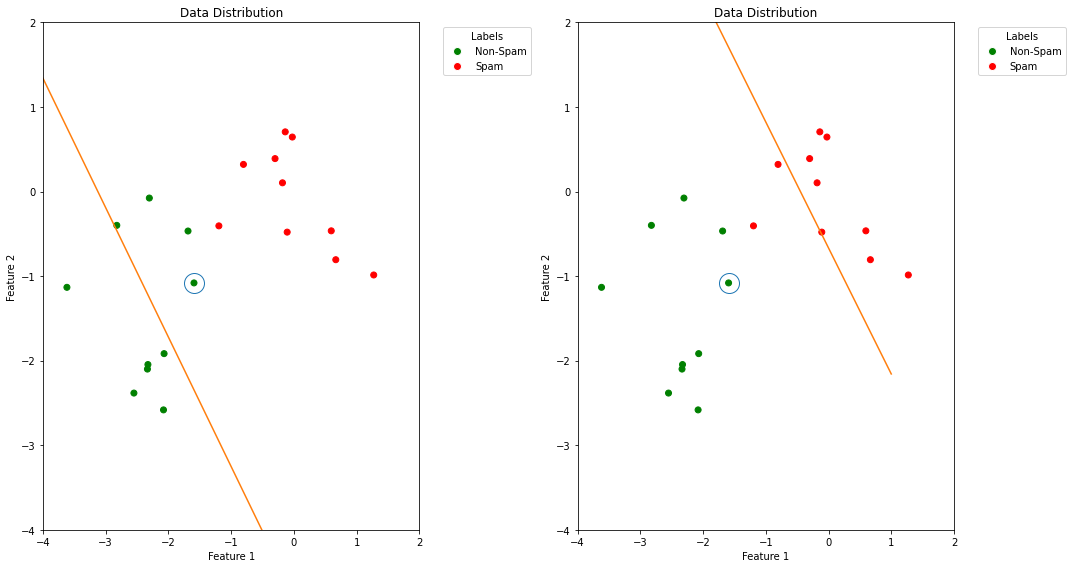

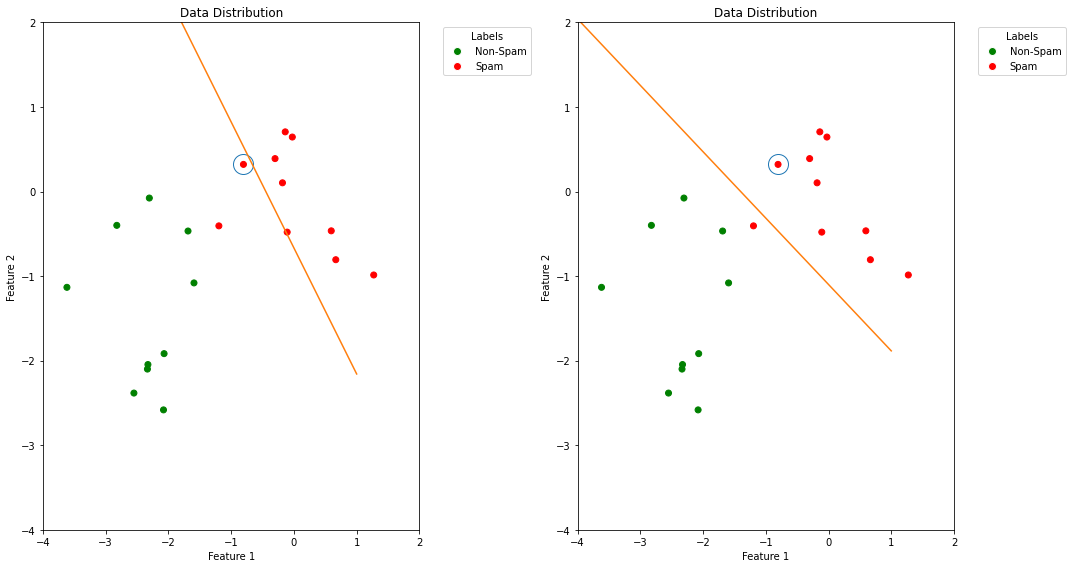

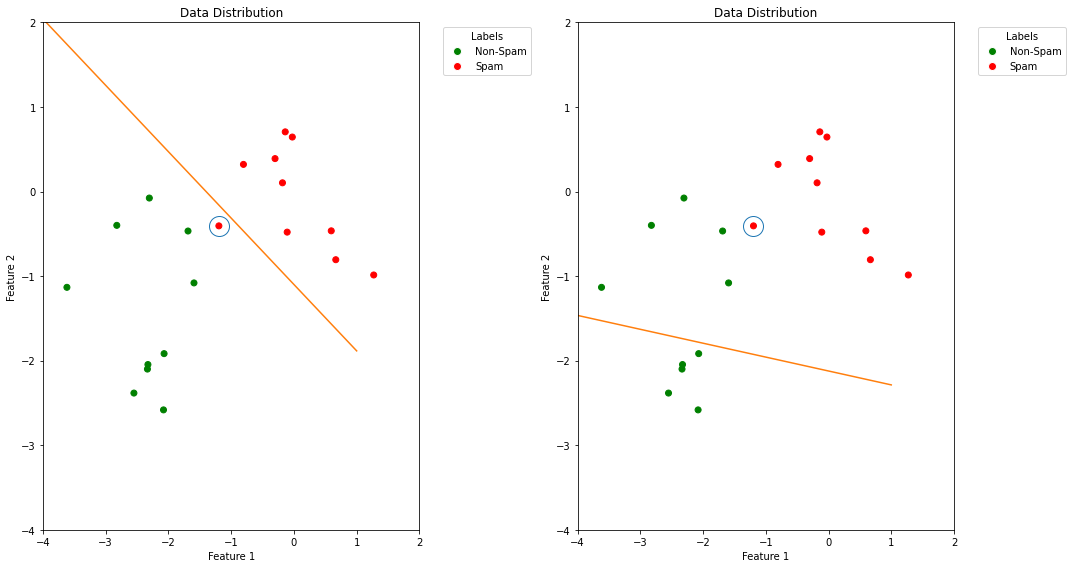

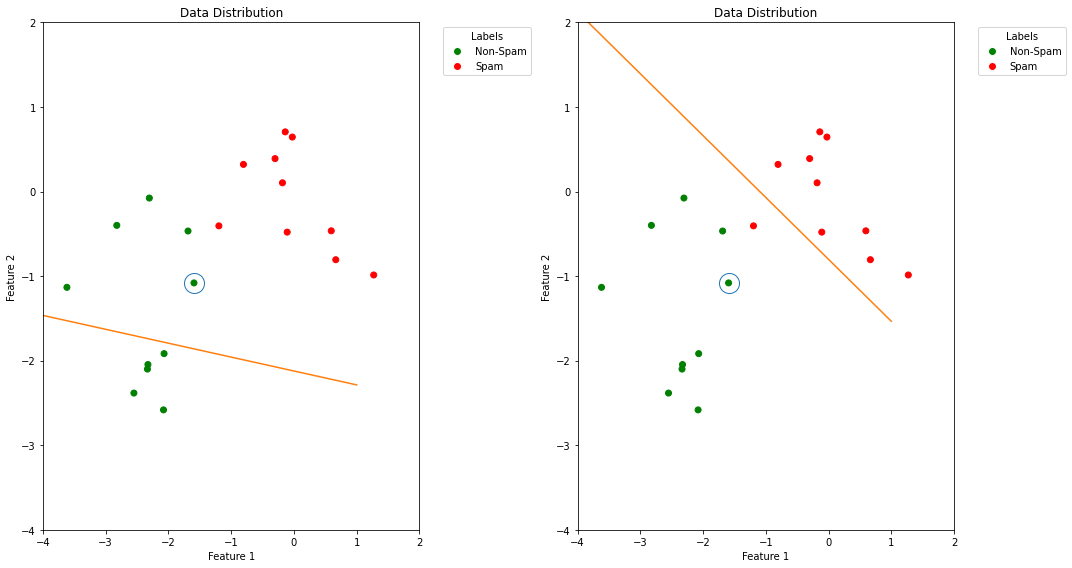

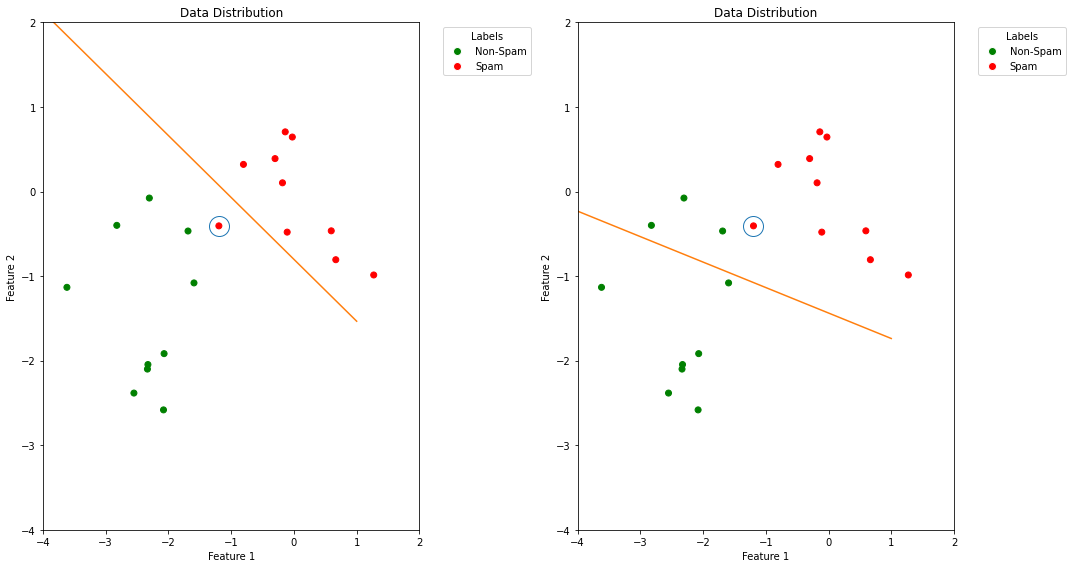

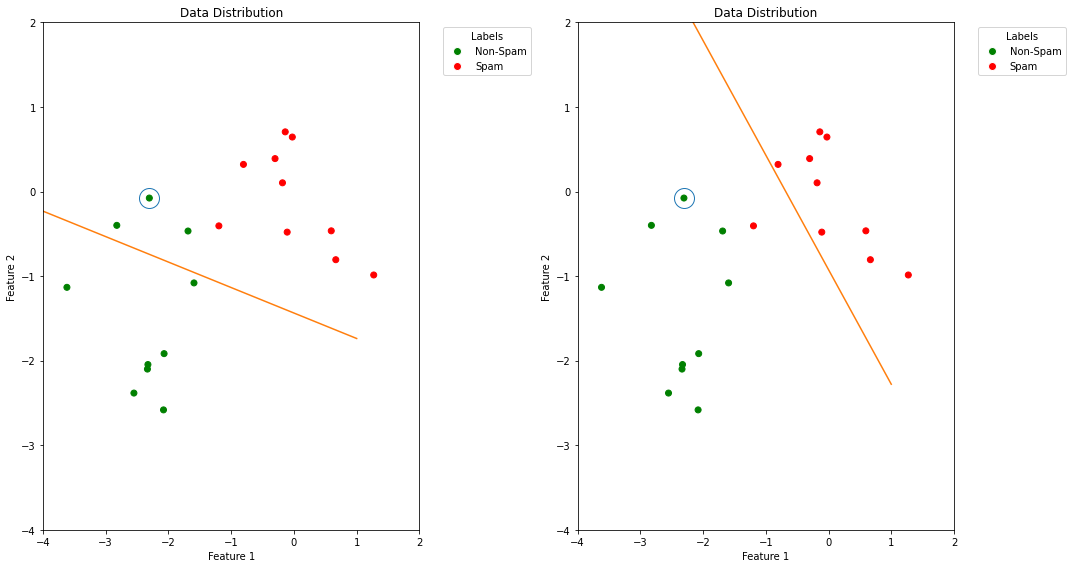

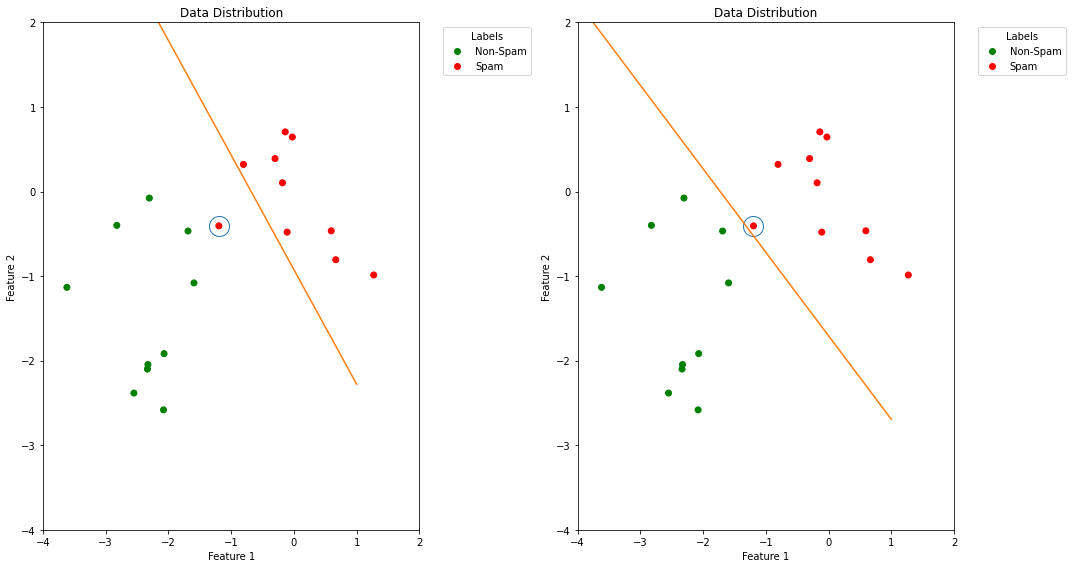

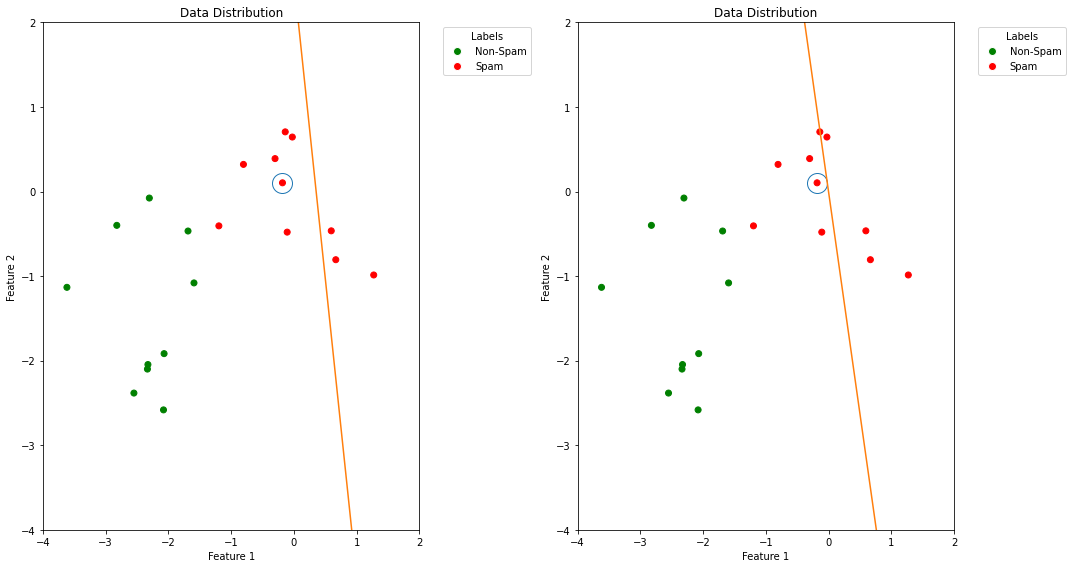

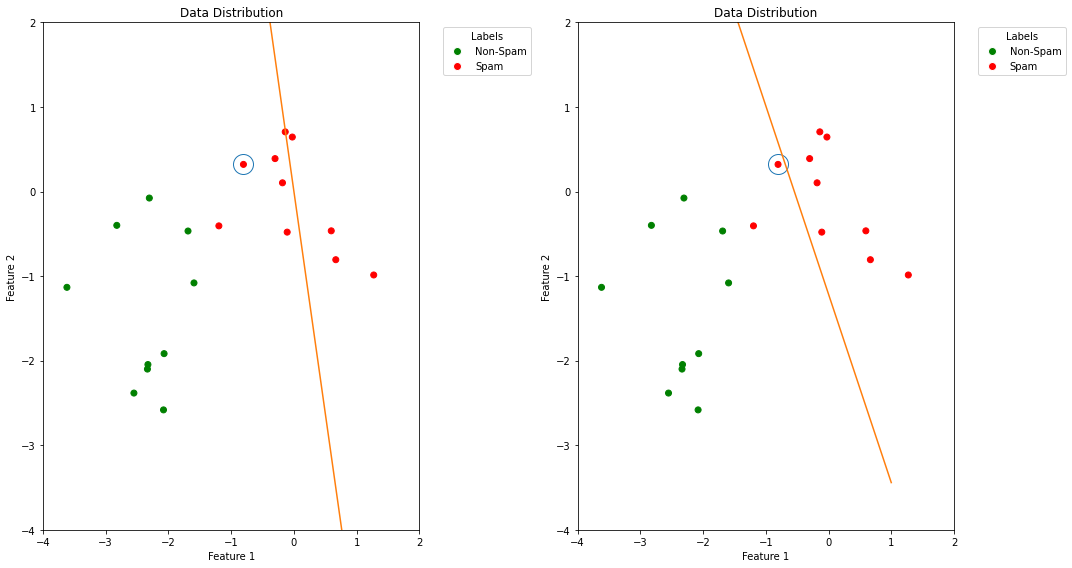

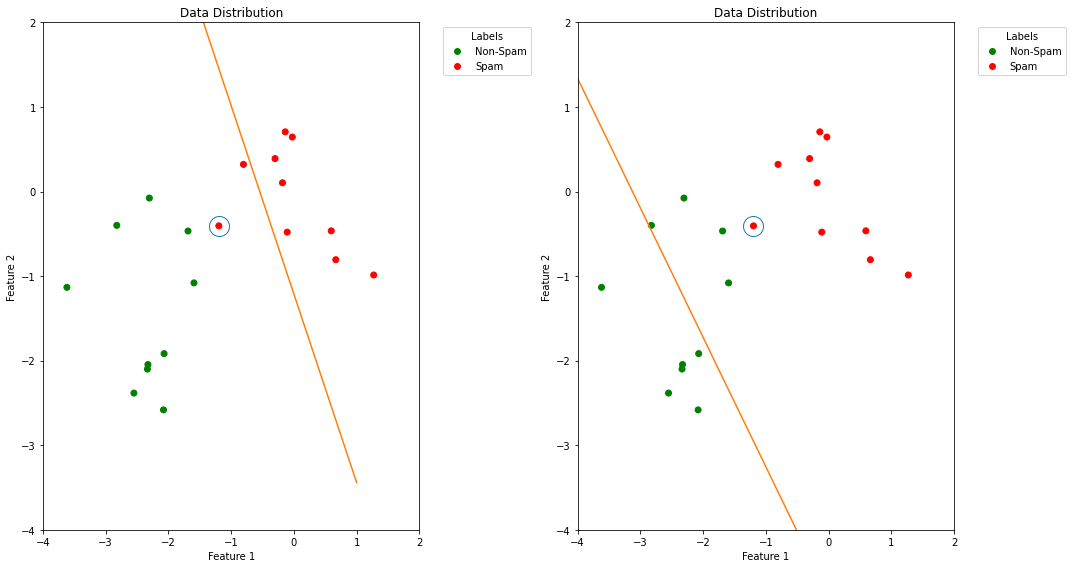

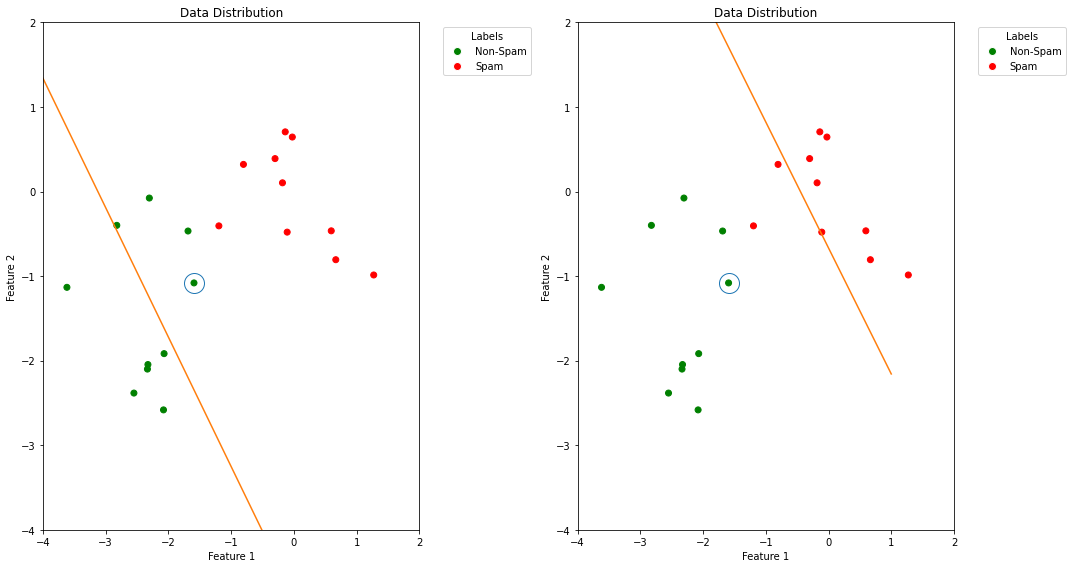

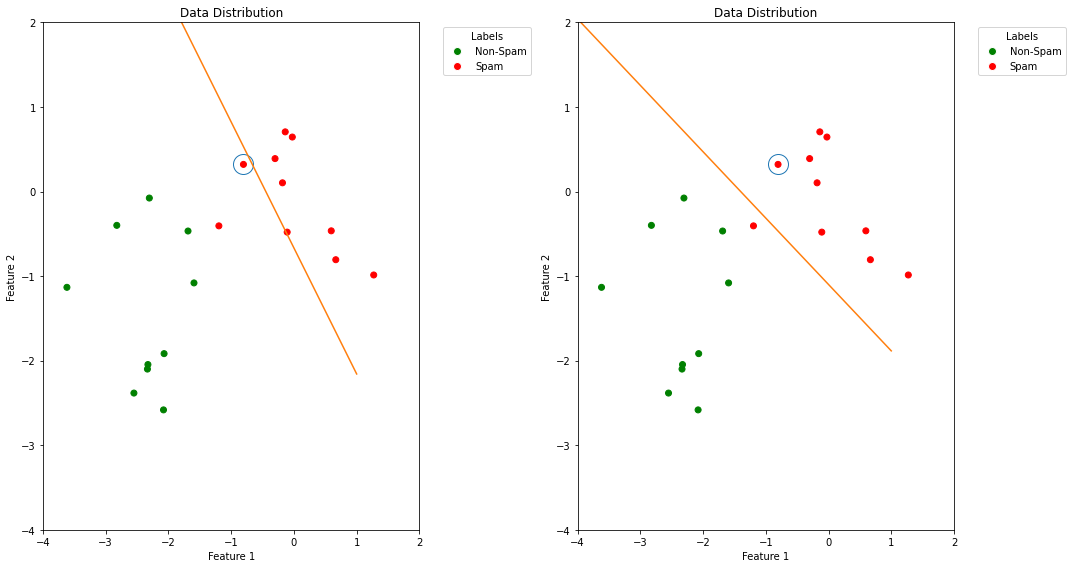

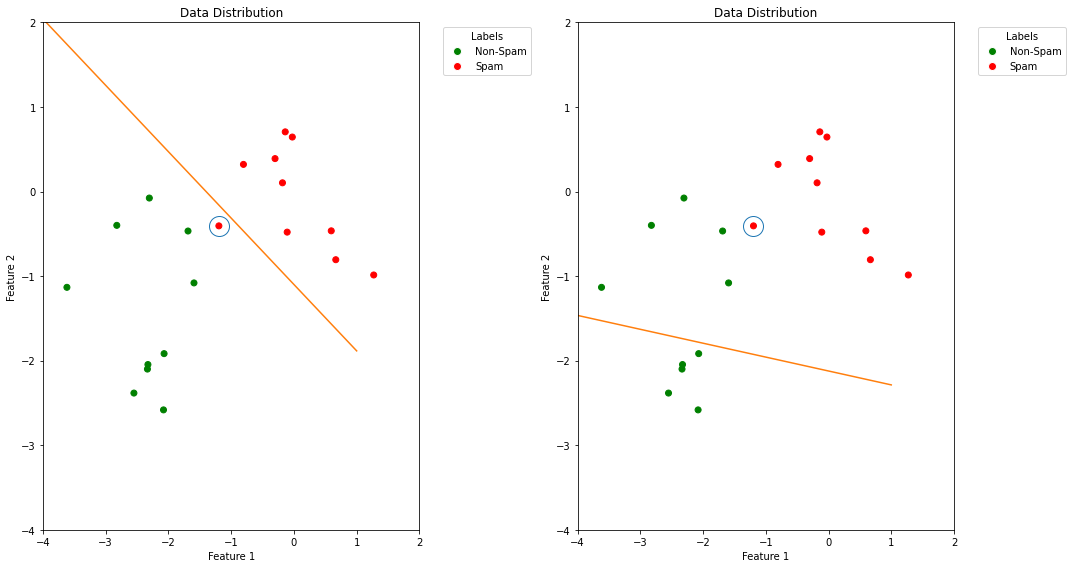

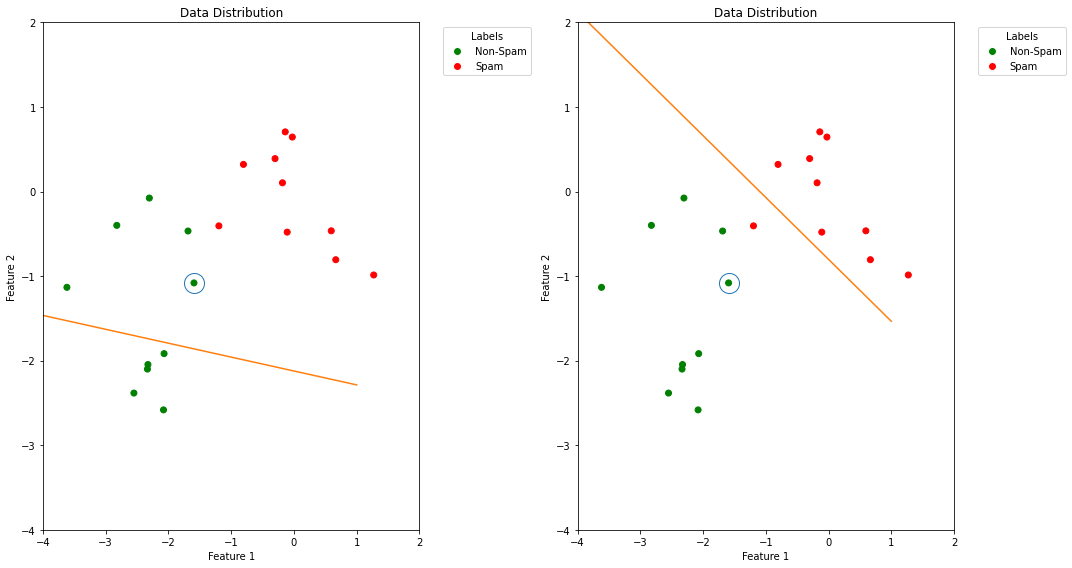

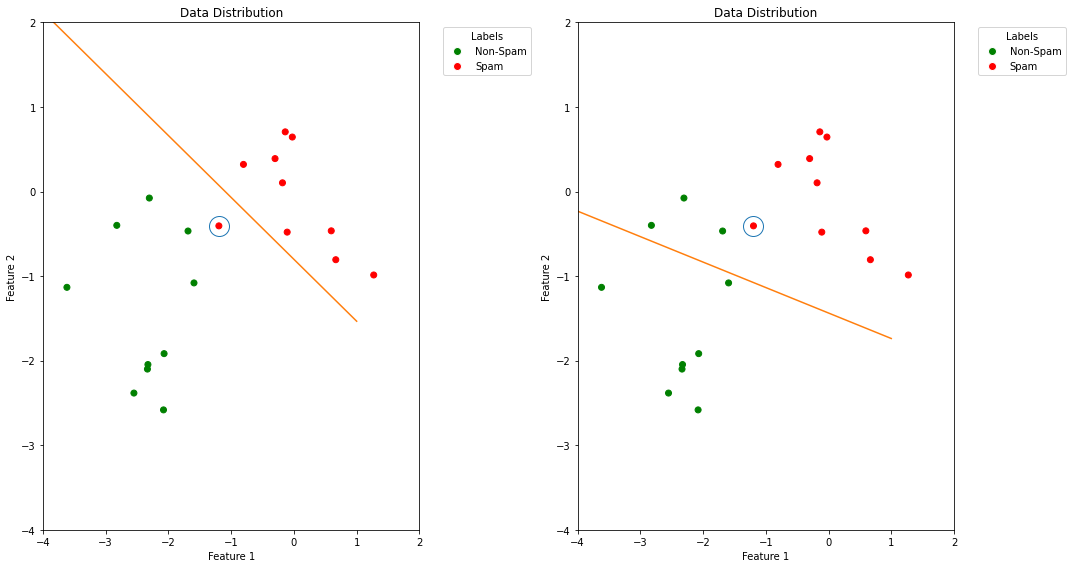

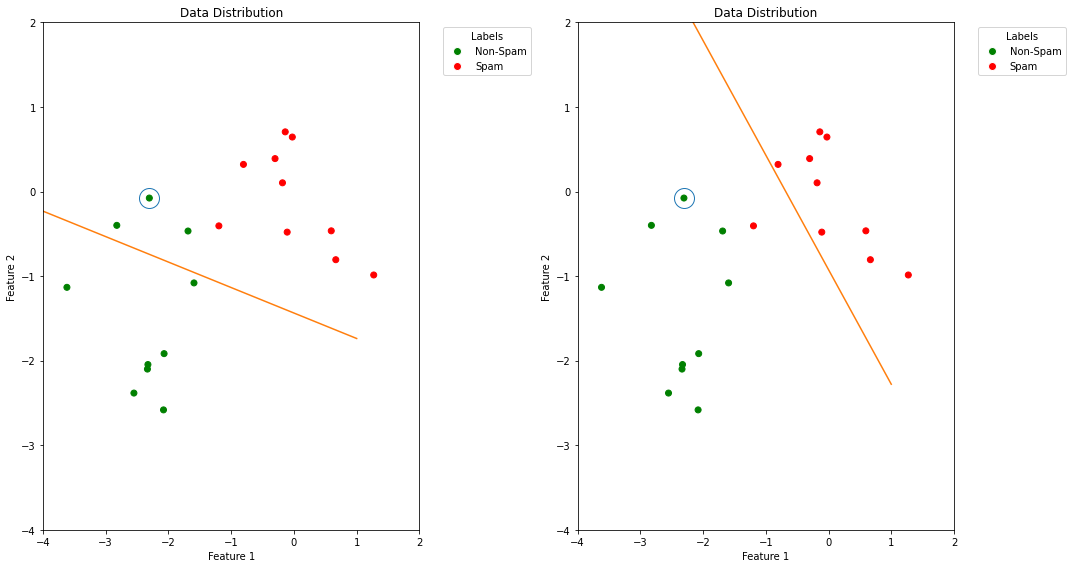

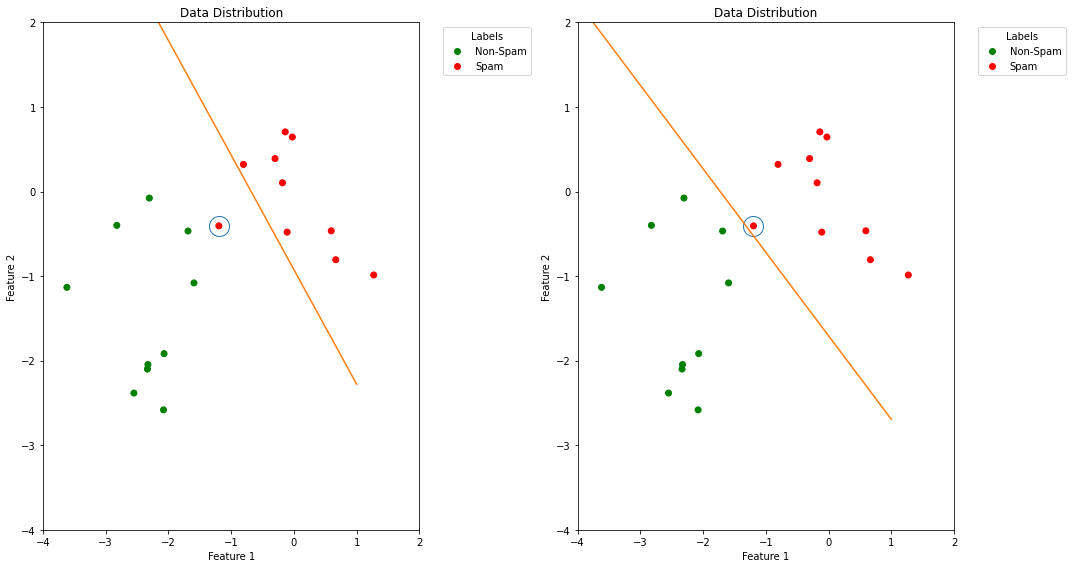

In [ ]:
ws, xs = history['ws'], history['xs']
for i in range(1, len(ws)):
  w_prev = ws[i-1]
  w = ws[i]
  x = xs[i]
  fig = plt.figure(figsize=(15, 8))
  gs = GridSpec(nrows=1, ncols=2)

  ax00 = fig.add_subplot(gs[0, 0])
  ax00.plot(x[1], x[2], marker="o", markersize=20, fillstyle='none')
  plot_data_with_separator(D, w_prev.tolist())

  ax01 = fig.add_subplot(gs[0, 1])
  ax01.plot(x[1], x[2], marker="o", markersize=20, fillstyle='none')
  plot_data_with_separator(D, w.tolist())

  fig.tight_layout()
  display(fig)